In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'D:\Kaggle\Real_Estate.csv')
df

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,2012-09-02 16:42:30.519336,13.3,4082.01500,8,25.007059,121.561694,6.488673
1,2012-09-04 22:52:29.919544,35.5,274.01440,2,25.012148,121.546990,24.970725
2,2012-09-05 01:10:52.349449,1.1,1978.67100,10,25.003850,121.528336,26.694267
3,2012-09-05 13:26:01.189083,22.2,1055.06700,5,24.962887,121.482178,38.091638
4,2012-09-06 08:29:47.910523,8.5,967.40000,6,25.011037,121.479946,21.654710
...,...,...,...,...,...,...,...
409,2013-07-25 15:30:36.565239,18.3,170.12890,6,24.981186,121.486798,29.096310
410,2013-07-26 17:16:34.019780,11.9,323.69120,2,24.950070,121.483918,33.871347
411,2013-07-28 21:47:23.339050,0.0,451.64190,8,24.963901,121.543387,25.255105
412,2013-07-29 13:33:29.405317,35.9,292.99780,5,24.997863,121.558286,25.285620


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Transaction date                     414 non-null    object 
 1   House age                            414 non-null    float64
 2   Distance to the nearest MRT station  414 non-null    float64
 3   Number of convenience stores         414 non-null    int64  
 4   Latitude                             414 non-null    float64
 5   Longitude                            414 non-null    float64
 6   House price of unit area             414 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 22.8+ KB


In [5]:
df.describe()

,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,18.405072,1064.468233,4.265700,24.973605,121.520268,29.102149
std,11.757670,1196.749385,2.880498,0.024178,0.026989,15.750935
min,0.000000,23.382840,0.000000,24.932075,121.473888,0.000000
25%,9.900000,289.324800,2.000000,24.952422,121.496866,18.422493
50%,16.450000,506.114400,5.000000,24.974353,121.520912,30.394070
75%,30.375000,1454.279000,6.750000,24.994947,121.544676,40.615184
max,42.700000,6306.153000,10.000000,25.014578,121.565321,65.571716


In [6]:
df.isnull().sum()

Transaction date                       0
House age                              0
Distance to the nearest MRT station    0
Number of convenience stores           0
Latitude                               0
Longitude                              0
House price of unit area               0
dtype: int64

<Axes: xlabel='House age'>

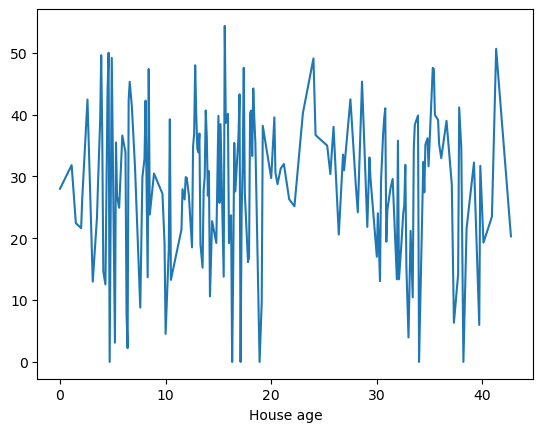

In [12]:
df.groupby(['House age'])['House price of unit area'].mean().plot()

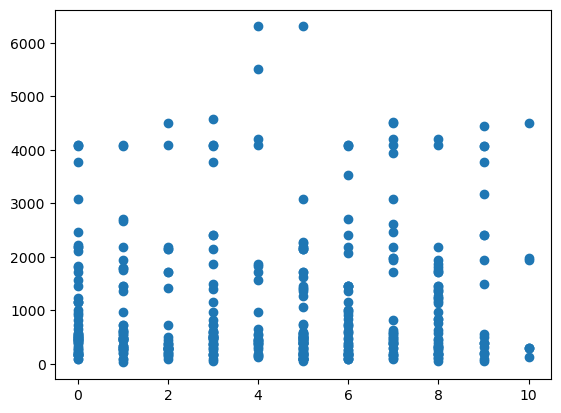

In [14]:
plt.scatter(x= df['Number of convenience stores'], y= df['Distance to the nearest MRT station'])

In [34]:
df['Transaction date'] = pd.to_datetime(df['Transaction date'])
df['Transaction date'] = pd.DatetimeIndex(df['Transaction date']).year

In [35]:
y = df['House price of unit area']
X = df.drop('House price of unit area', axis= 1)

In [36]:
from sklearn import model_selection, linear_model

In [37]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y, test_size=0.3)

# Linear Regression

In [43]:
lr = linear_model.LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [44]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

# Predicting Cross Validation Score the Test set results
cv_linear = cross_val_score(estimator = lr, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_linear_train = lr.predict(X_train)
r2_score_linear_train = r2_score(y_train, y_pred_linear_train)

# Predicting R2 Score the Test set results
y_pred_linear_test = lr.predict(X_test)
r2_score_linear_test = r2_score(y_test, y_pred_linear_test)

# Predicting RMSE the Test set results
rmse_linear = (np.sqrt(mean_squared_error(y_test, y_pred_linear_test)))
print("CV: ", cv_linear.mean())
print('R2_score (train): ', r2_score_linear_train)
print('R2_score (test): ', r2_score_linear_test)
print("RMSE: ", rmse_linear)

CV:  0.48205680430605335
R2_score (train):  0.5254710915864493
R2_score (test):  0.5145115497741555
RMSE:  10.514277346083244


# Lasso Regresson

In [45]:
Lasso = linear_model.Lasso
lasso = Lasso(alpha = 10)
lasso.fit(X_train,y_train)

Lasso(alpha=10)

In [46]:
# Predicting the cross validationscore of the test results
cv_lasso = cross_val_score(estimator=lasso, X=X_train, y=y_train)

# Predicting r2 score of the training set
y_pred_lasso_train = lasso.predict(X_train)
r2_score_lasso_train = r2_score(y_train, y_pred_lasso_train)

# Predicting r2 score of the testing set
y_pred_lasso_test = lasso.predict(X_test)
r2_score_lasso_test = r2_score(y_test, y_pred_lasso_test)

# Predicting RMSE of the test set results
rmse_lasso = (np.sqrt(mean_squared_error(y_test, y_pred_lasso_test)))

print('CV: ', cv_lasso.mean())
print('r2 score(train): ',r2_score_lasso_train)
print('r2 score(test): ',r2_score_lasso_test)
print('RMSE: ', rmse_lasso)

CV:  0.4451052324759347
r2 score(train):  0.4634842233420179
r2 score(test):  0.4607522495297479
RMSE:  11.081132514797815


# Ridge Regression

In [49]:
Ridge = linear_model.Ridge

ridge = Ridge(alpha=10)
ridge.fit(X_train,y_train)

Ridge(alpha=10)

In [50]:
# Predicting the cross validationscore of the test results
cv_ridge = cross_val_score(estimator=lasso, X=X_train, y=y_train)

# Predicting r2 score of the training set
y_pred_ridge_train = ridge.predict(X_train)
r2_score_ridge_train = r2_score(y_train, y_pred_ridge_train)

# Predicting r2 score of the testing set
y_pred_ridge_test = ridge.predict(X_test)
r2_score_ridge_test = r2_score(y_test, y_pred_ridge_test)

# Predicting RMSE of the test set results
rmse_ridge = (np.sqrt(mean_squared_error(y_test, y_pred_ridge_test)))

print('CV: ', cv_ridge.mean())
print('r2 score(train): ',r2_score_ridge_train)
print('r2 score(test): ',r2_score_ridge_test)
print('RMSE: ', rmse_ridge)

CV:  0.4451052324759347
r2 score(train):  0.5145718997584441
r2 score(test):  0.506036802264928
RMSE:  10.605649594395192


# Polynomial Regression

In [55]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_poly, y_train)

regressor_poly2 = linear_model.LinearRegression()
regressor_poly2.fit(X_poly, y_train)

LinearRegression()

In [56]:
# Predicting Cross Validation Score the Test set results
cv_poly2 = cross_val_score(estimator = regressor_poly2, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_poly2_train = regressor_poly2.predict(poly_reg.fit_transform(X_train))
r2_score_poly2_train = r2_score(y_train, y_pred_poly2_train)

# Predicting R2 Score the Test set results
y_pred_poly2_test = regressor_poly2.predict(poly_reg.fit_transform(X_test))
r2_score_poly2_test = r2_score(y_test, y_pred_poly2_test)

# Predicting RMSE the Test set results
rmse_poly2 = (np.sqrt(mean_squared_error(y_test, y_pred_poly2_test)))
print('CV: ', cv_poly2.mean())
print('R2_score (train): ', r2_score_poly2_train)
print('R2_score (test): ', r2_score_poly2_test)
print("RMSE: ", rmse_poly2)

CV:  0.48205680430605335
R2_score (train):  0.558863242118136
R2_score (test):  0.47656566447832893
RMSE:  10.91744672100503


# Support Vector Machines

In [ ]:
# Predicting the cross validationscore of the test results
cv_ridge = cross_val_score(estimator=lasso, X=X_train, y=y_train)

# Predicting r2 score of the training set
y_pred_ridge_train = ridge.predict(X_train)
r2_score_ridge_train = r2_score(y_train, y_pred_ridge_train)

# Predicting r2 score of the testing set
y_pred_ridge_test = ridge.predict(X_test)
r2_score_ridge_test = r2_score(y_test, y_pred_ridge_test)

# Predicting RMSE of the test set results
rmse_ridge = (np.sqrt(mean_squared_error(y_test, y_pred_ridge_test)))

print('CV: ', cv_ridge.mean())
print('r2 score(train): ',r2_score_ridge_train)
print('r2 score(test): ',r2_score_ridge_test)
print('RMSE: ', rmse_ridge)

# Decision Tree Regression

In [ ]:
# Predicting the cross validationscore of the test results
cv_ridge = cross_val_score(estimator=lasso, X=X_train, y=y_train)

# Predicting r2 score of the training set
y_pred_ridge_train = ridge.predict(X_train)
r2_score_ridge_train = r2_score(y_train, y_pred_ridge_train)

# Predicting r2 score of the testing set
y_pred_ridge_test = ridge.predict(X_test)
r2_score_ridge_test = r2_score(y_test, y_pred_ridge_test)

# Predicting RMSE of the test set results
rmse_ridge = (np.sqrt(mean_squared_error(y_test, y_pred_ridge_test)))

print('CV: ', cv_ridge.mean())
print('r2 score(train): ',r2_score_ridge_train)
print('r2 score(test): ',r2_score_ridge_test)
print('RMSE: ', rmse_ridge)

# Random Forest Regression

In [ ]:
# Predicting the cross validationscore of the test results
cv_ridge = cross_val_score(estimator=lasso, X=X_train, y=y_train)

# Predicting r2 score of the training set
y_pred_ridge_train = ridge.predict(X_train)
r2_score_ridge_train = r2_score(y_train, y_pred_ridge_train)

# Predicting r2 score of the testing set
y_pred_ridge_test = ridge.predict(X_test)
r2_score_ridge_test = r2_score(y_test, y_pred_ridge_test)

# Predicting RMSE of the test set results
rmse_ridge = (np.sqrt(mean_squared_error(y_test, y_pred_ridge_test)))

print('CV: ', cv_ridge.mean())
print('r2 score(train): ',r2_score_ridge_train)
print('r2 score(test): ',r2_score_ridge_test)
print('RMSE: ', rmse_ridge)